In [1]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [0]:
#Importing necessory packages
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


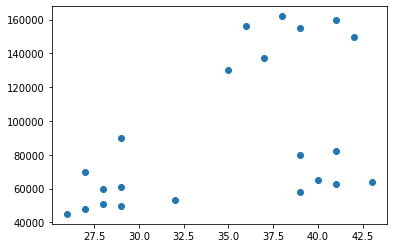

In [4]:
plt.scatter(df['Age'], df['Income($)'])


In [0]:
km_model = KMeans(n_clusters=3)
km_model.fit(df[['Age']],df[['Income($)']])
y_predict = km_model.predict(df[['Age']])

In [17]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


No handles with labels found to put in legend.


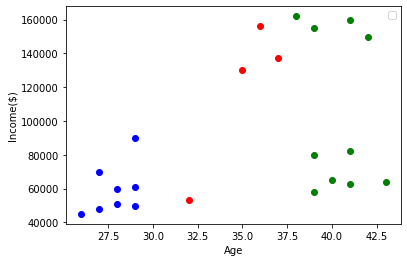

In [18]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [21]:
# Preprocessing the Data
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df[['Income($)']] = scalar.transform(df[['Income($)']])

scalar.fit(df[['Age']])
df[['Age']] = scalar.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


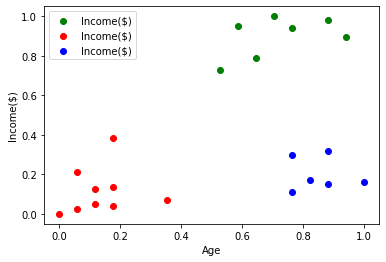

In [30]:
# After Prepocessing
km_model = KMeans(n_clusters=3)
y_predict = km_model.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predict

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='green', label='Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Income($)')
plt.scatter(df3.Age, df3['Income($)'], color='blue', label='Income($)')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [26]:
km_model.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

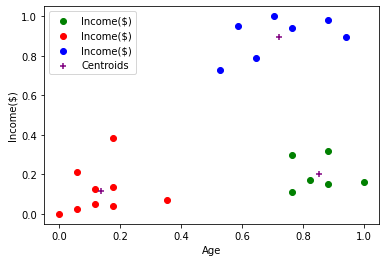

In [29]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Income($)')
plt.scatter(df3.Age, df3['Income($)'], color='blue', label='Income($)')
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], marker='+', color='purple', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [0]:
#IF More data means use Elbow Plot

k_range = range(1,11)
sse = []

for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)


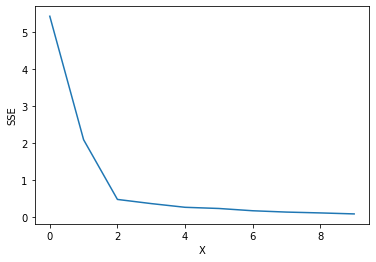

In [32]:
plt.xlabel('X')
plt.ylabel('SSE')
plt.plot(sse)